# # 광주 서구 안전지대 - 공공데이터 cctv 기반

In [43]:
import pandas as pd
from plotnine import *
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import numpy as np
import seaborn as sns
import folium

In [45]:
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

In [46]:
%ls

LiquidCrystal_I2C/
LiquidCrystal_I2C.zip
Untitled.ipynb
cctv_west.csv
jisoo/
login.html
rprocess.php
title.png
title2.png
무제 폴더/
김종우_수업과정.hwp
스크린샷 2020-02-17 오후 7.39.10.png
스크린샷 2020-02-19 오후 3.44.20.png
스크린샷 2020-02-19 오후 3.52.26.png
스크린샷 2020-02-19 오후 4.11.42.png
스크린샷 2020-02-20 오전 7.10.15.png
스크린샷 2020-02-20 오전 7.10.29.png


In [47]:
cctv = pd.read_csv('cctv_west.csv', encoding='cp949')

In [48]:
cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,광주광역시 서구청,NaN,광주광역시 서구 화정동 97-15,생활방범,2,130.0,약100M,NaN,2017-01,062-360-7253,35.156920,126.875500,2019-10-11
1,광주광역시 서구청,광주광역시 서구 화정로244번길 33-1 (화정동),광주광역시 서구 화정동 938,생활방범,2,200.0,약100M,NaN,2017-01,062-360-7253,35.144599,126.885808,2019-10-11
2,광주광역시 서구청,광주광역시 서구 염화로31번길 10 (화정동),광주광역시 서구 화정동 929-2,어린이보호,2,200.0,약120M,NaN,2017-09,062-360-7253,35.137481,126.871716,2019-10-11
3,광주광역시 서구청,광주광역시 서구 염화로 37 (화정동),광주광역시 서구 화정동 929-1,어린이보호,2,200.0,약120M,NaN,2017-09,062-360-7253,35.138235,126.872173,2019-10-11
4,광주광역시 서구청,광주광역시 서구 염화로 37 (화정동),광주광역시 서구 화정동 929-1,어린이보호,2,200.0,약120M,NaN,2017-01,062-360-7253,35.138235,126.872173,2019-10-11


In [49]:
cctv['설치목적구분'].value_counts()

생활방범     170
어린이보호    161
교통단속      86
재난재해      10
Name: 설치목적구분, dtype: int64

In [50]:
cctv.shape

(427, 13)

In [51]:
cctv.columns

Index(['관리기관명', '소재지도로명주소', '소재지지번주소', '설치목적구분', '카메라대수', '카메라화소수', '촬영방면정보',
       '보관일수', '설치년월', '관리기관전화번호', '위도', '경도', '데이터기준일자'],
      dtype='object')

In [52]:
target_index = ['설치목적구분','촬영방면정보','위도','경도','카메라화소수']

In [53]:
result = cctv.loc[cctv['설치목적구분'].str.contains('생활방범|어린이보호'), target_index]

In [54]:
result.isnull().sum()

설치목적구분     0
촬영방면정보    51
위도         0
경도         0
카메라화소수     4
dtype: int64

In [55]:
result.head()

,설치목적구분,촬영방면정보,위도,경도,카메라화소수
0,생활방범,약100M,35.156920,126.875500,130.0
1,생활방범,약100M,35.144599,126.885808,200.0
2,어린이보호,약120M,35.137481,126.871716,200.0
3,어린이보호,약120M,35.138235,126.872173,200.0
4,어린이보호,약120M,35.138235,126.872173,200.0


In [56]:
data_ggplot = result.copy()
data_ggplot.shape

(331, 5)

In [57]:
data_ggplot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 340
Data columns (total 5 columns):
설치목적구분    331 non-null object
촬영방면정보    280 non-null object
위도        331 non-null float64
경도        331 non-null float64
카메라화소수    327 non-null float64
dtypes: float64(3), object(2)
memory usage: 15.5+ KB


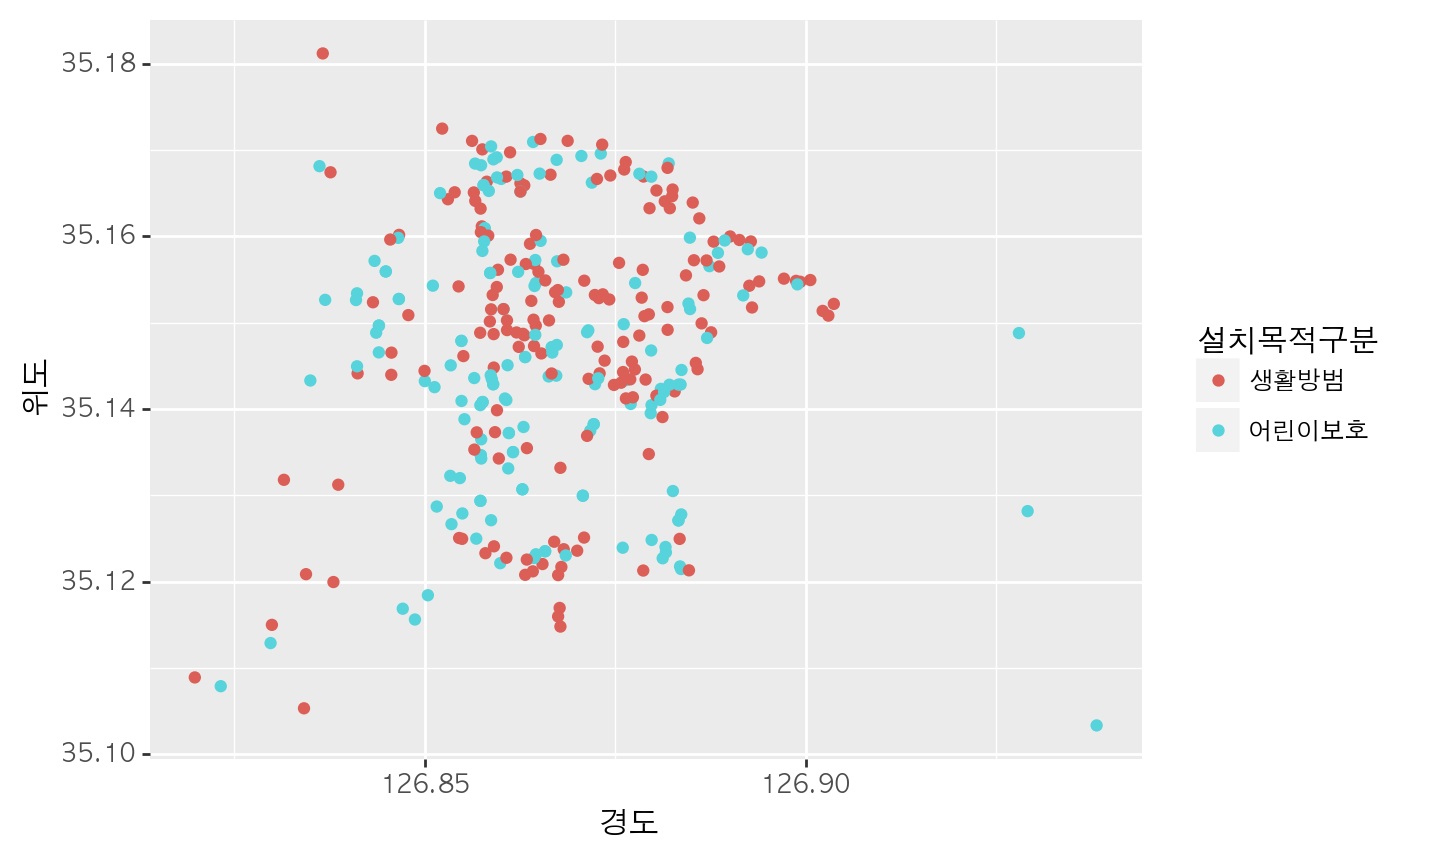

<ggplot: (7552057177)>

In [58]:
 (ggplot(data_ggplot)
  + aes(x='경도', y='위도', color='설치목적구분')
  + geom_point()
  + theme(text=element_text(family='AppleGothic'))
 )

In [59]:
# folim.Map?

In [60]:
geo_df = result.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '설치목적구분'] 
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['설치목적구분'][n] == '생활방범' :
        icon_color = 'pink'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [61]:

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['설치목적구분'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['설치목적구분'][n] == '생활방범' :
        icon_color = 'red'
    else:
        icon_color = 'blue'    
    
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.CircleMarker(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

In [62]:
geo_df = result.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '설치목적구분'] 
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['설치목적구분'][n] == '생활방범' :
        icon_color = 'red'
    else:
        icon_color = 'blue'    
    
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.CircleMarker(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
map